<b>Probability with Python

<b>Basic Concept - Determine the probability of ace

In [3]:
# Sample Space
cards = 52

# Outcomes
aces = 4

# Divide possible outcomes by the sample set
ace_probability = aces / cards

round(ace_probability,2)


0.08

<b>Determine the probability of drawing a heart

In [4]:
# Sample Space
cards = 52

#Event Outcome
hearts = 13

hearts_probability = hearts/cards

round(hearts_probability,2)

0.25

<b>Create function that returns probability percent rounded to one decimal place

In [5]:
def event_probability(event_outcome,sample_space):
    probability = (event_outcome/sample_space) * 100
    return round(probability,2)

# Sample Space
cards = 52

#Event Outcome
hearts = 13

event_probability(hearts,cards)

25.0

<b>Determine the probability of drawing a face card

In [6]:
#Event_Outcome
face_card = 12
event_probability(face_card,cards)

23.08

<b>Determine the probability of drawing the queen of hearts

In [7]:
#Event_Outcome
ace_of_heart = 1
event_probability(ace_of_heart,cards)

1.92

<b>Conditional Probability

In [22]:
import pandas as pd

df = pd.DataFrame({'company': ['ford', 'chevy', 'ford', 'ford', 'ford', 'toyota'],
                     'model': ['mustang', 'camaro', 'fiesta', 'focus', 'taurus', 'camry'],
                     'rating': ['A', 'B', 'C', 'A', 'B', 'B'],
                     'type': ['coupe', 'coupe', 'sedan', 'sedan', 'sedan', 'sedan']})

print(round(df.groupby('rating').count()['model'] / len(df),2))

print((df.groupby(['rating', 'type']).count() / df.groupby('rating').count())['model'])

rating
A    0.33
B    0.50
C    0.17
Name: model, dtype: float64
rating  type 
A       coupe    0.500000
        sedan    0.500000
B       coupe    0.333333
        sedan    0.666667
C       sedan    1.000000
Name: model, dtype: float64


<b>Find PDF[Probability distribution Function - density of a continuous random variable] and The cumulative distribution function (CDF) of a random variable is another method to describe the distribution of random variables. 

In [30]:
import scipy.stats

print(scipy.stats.norm(0, 1))

print(scipy.stats.norm(0, 1).pdf(0))
print(scipy.stats.norm(0, 1).cdf(0))
print(scipy.stats.norm(100, 12))
print(scipy.stats.norm(100, 12).pdf(98))
print(scipy.stats.norm(100, 12).cdf(98))
print(scipy.stats.norm(100, 12).cdf(100))

0.032786643008494994
0.43381616738909634
0.5


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
from scipy.stats import norm

<b>Normal Distribution

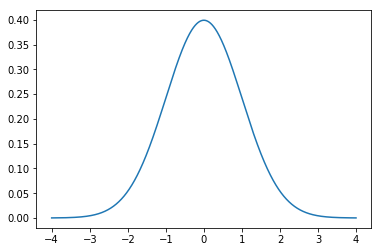

In [37]:
x= np.arange(-4,4,0.001)
plt.plot(x,norm.pdf(x))

plt.show()

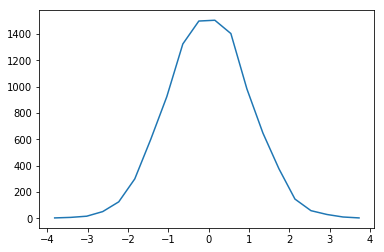

In [39]:
x = np.random.randn(10000)

nbins = 20

n, bins = np.histogram(x, nbins)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

plt.plot(pdfx, pdfy)

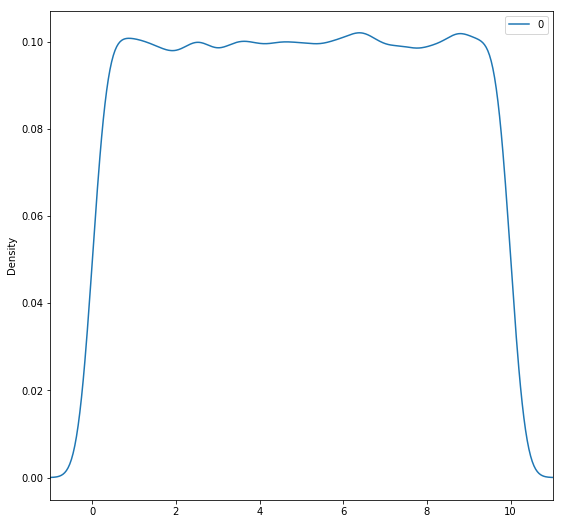

In [35]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0
                                 scale=10)     # To 10

pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

<b>Bayes Theorem

In [40]:
def get_outcomes(sample_space, f_name='', e_name=''):
    outcomes = 0
    for e_k, e_v in sample_space.items():
        if f_name=='' or f_name==e_k:
            for se_k, se_v in e_v.items():
                if e_name!='' and se_k == e_name:
                    outcomes+=se_v
                elif e_name=='':
                    outcomes+=se_v
    return outcomes

def p(sample_space, f_name):
    return get_outcomes(sample_space, f_name) / get_outcomes(sample_space, '', '')

def p_inters(sample_space, f_name, e_name):
    return get_outcomes(sample_space, f_name, e_name) / get_outcomes(sample_space, '', '')

def p_conditional(sample_space, f_name, e_name):
    return p_inters(sample_space, f_name, e_name) / p(sample_space, f_name)

def bayes(sample_space, f, given_e):
    sum = 0;
    for e_k, e_v in sample_space.items():
        sum+=p(sample_space, e_k) * p_conditional(sample_space, e_k, given_e)
    return p(sample_space, f) * p_conditional(sample_space, f, given_e) / sum

sample_space = {'UK':{'Boy':10, 'Girl':20},
                'FR':{'Boy':10, 'Girl':10},
                'CA':{'Boy':10, 'Girl':30}}

print('Probability of being from FR:', p(sample_space, 'FR'))
print('Probability to be French Boy:', p_inters(sample_space, 'FR', 'Boy'))
print('Probability of being a Boy given a person is from FR:', p_conditional(sample_space, 'FR', 'Boy'))
print('Probability to be from France given person is Boy:', bayes(sample_space, 'FR', 'Boy'))

sample_space = {'Grow' :{'Up':160, 'Down':40},
                'Slows':{'Up':30, 'Down':70}}

print('Probability economy is growing when stock is Up:', bayes(sample_space, 'Grow', 'Up'))

Probability of being from FR: 0.2222222222222222
Probability to be French Boy: 0.1111111111111111
Probability of being a Boy given a person is from FR: 0.5
Probability to be from France given person is Boy: 0.3333333333333333
Probability economy is growing when stock is Up: 0.8421052631578948


<b>Basic Statistic 

In [43]:
import statistics

agesData=[10,23,34,11,23,33,12,11,15,11]

print(statistics.mean(agesData))
print(statistics.mode(agesData))
print(statistics.median(agesData))
print(sorted(agesData))
print(statistics.variance(agesData))
print(statistics.stdev(agesData))

18.3
11
13.5
[10, 11, 11, 11, 12, 15, 23, 23, 33, 34]
87.34444444444445
9.345824973989426


<b>Use Case

In [41]:
#total number of participants
total=100000

#Probability of students agree that the duration of
# the courses conducted by Edureka is just right
agree=0.80

# probability of students having university degree
university_degree=0.1

#probability of students fit in both categories
agree_with_degree=0.05

#Part 1 solution
if(agree_with_degree==0):
    print("Both events are disjoint")
else:
    print("Events are not disjoint")


#Part 3 solution

#Probability that a randomly drawn person has a university degree
# or agrees with the statement about duration time

soln=agree+university_degree-agree_with_degree

print("Probability that a randomly drawn person has a university degree or "
      "\n agrees with the statement about duration time is ",soln)

#Part 4 solution

#percent of the population do not have a university degree
# and disagree with the  statement about duration time of lectures

ans=1-soln
print("Percent of the population do not have a university degree "
      "\n and disagree with the  statement about duration time of lectures is ",ans)

Events are not disjoint
Probability that a randomly drawn person has a university degree or 
 agrees with the statement about duration time is  0.85
Percent of the population do not have a university degree 
 and disagree with the  statement about duration time of lectures is  0.15000000000000002
